# Пример использования библиотеки TheoryGamesDL

В этом ноутбуке показано, как использовать библиотеку TheoryGamesDL для моделирования социальных дилемм и применения методов обучения с подкреплением.

In [1]:
# Импортируем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
import json

# Импортируем компоненты нашей библиотеки
from theorygamesdl.models import SocialDilemma
from theorygamesdl.agents import sd_qlearning, DQNAgent, A2CAgent
from theorygamesdl.utils.simulation import simulate, simulate_neural
from theorygamesdl.utils.encoders import NpEncoder

## Часть 1: Классическое Q-обучение

### Пример 1: Дилемма заключенного

Рассмотрим классическую дилемму заключенного с выплатами [3, 1, 0, 4].

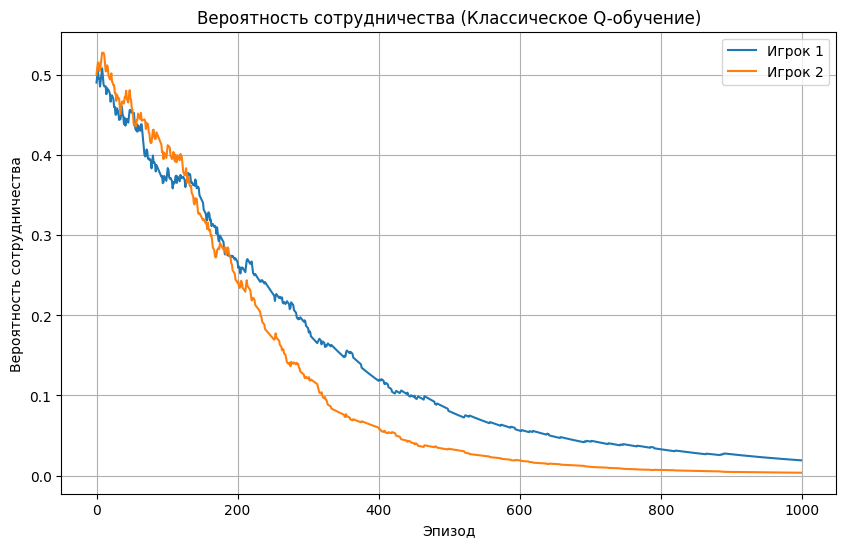

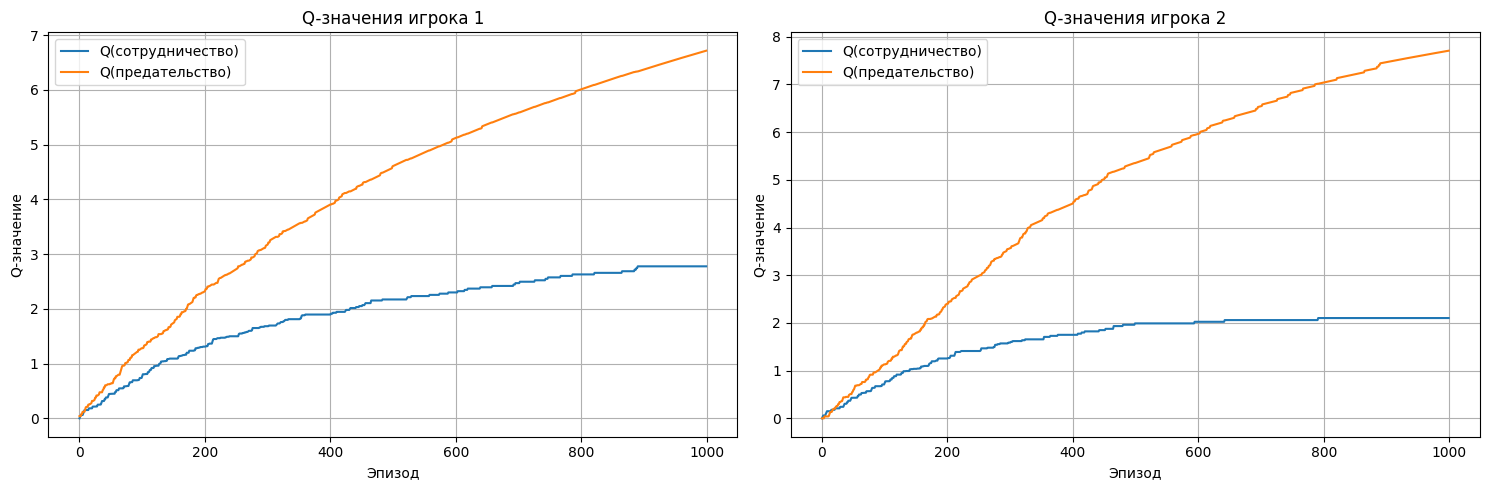

In [2]:
# Запускаем симуляцию дилеммы заключенного
pd_payoffs = [3, 1, 0, 4]  # Выплаты для дилеммы заключенного [CC, DD, DC, CD]
pol1_y1, pol2_y1, q1c, q1d, q2c, q2d, history, h_rew = simulate(
    pd=pd_payoffs, 
    time=1000,  # Количество эпизодов
    gamma=0.9,   # Коэффициент дисконтирования
    alpha=0.01,  # Скорость обучения
    beta=1,      # Параметр температуры для softmax-стратегии
    show_q=True  # Показывать графики Q-значений
)

### Пример 2: Сравнение различных типов социальных дилемм

Рассмотрим четыре классических типа социальных дилемм и сравним поведение агентов в них:

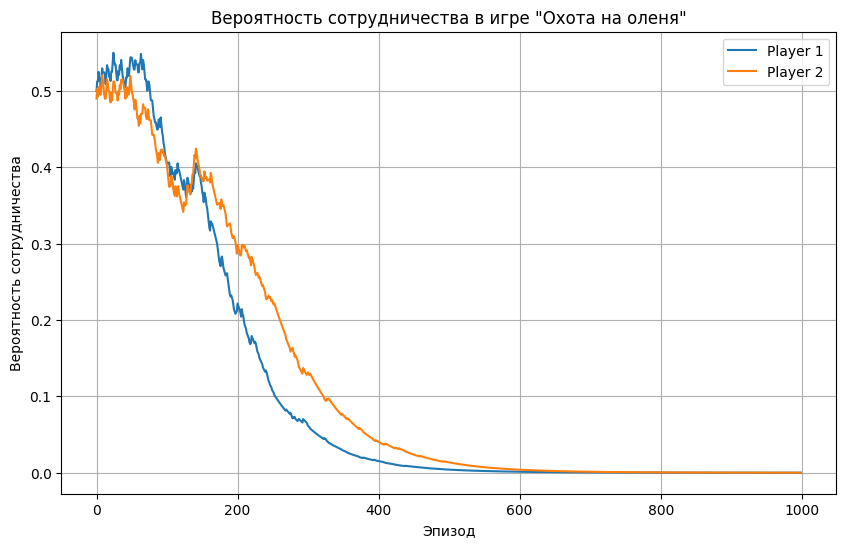

In [3]:
# Создаем и моделируем четыре типа социальных дилемм
dilemma_types = ['pd', 'sh', 'ch', 'bs']  # Дилемма заключенного, Охота на оленя, Игра в курицу, Битва полов
dilemma_names = ['Дилемма заключенного', 'Охота на оленя', 'Игра в курицу', 'Битва полов']

# Создаем списки для хранения результатов
all_pol1 = []
all_pol2 = []

# Моделируем каждую дилемму
for dilemma_type in dilemma_types:
    # Создаем игру
    game = SocialDilemma(dilemma_type=dilemma_type, steps_number=1)
    
    # Запускаем Q-обучение
    pol1, pol2, payoff_matrix1, payoff_matrix2, errs, history, Q1, Q2, h_rew = sd_qlearning(
        game, 
        episode_count=1000, 
        alpha=0.01, 
        gamma=0.9, 
        beta=1
    )
    
    # Преобразуем формат политик для анализа
    pol1 = np.moveaxis(pol1, 0, 1)
    pol2 = np.moveaxis(pol2, 0, 1)
    
    # Извлекаем вероятности сотрудничества
    pol1_y1 = [row[1] for row in pol1[0]]
    pol2_y1 = [row[1] for row in pol2[0]]
    
    # Сохраняем результаты
    all_pol1.append(pol1_y1)
    all_pol2.append(pol2_y1)

# Визуализируем результаты для всех дилемм
plt.figure(figsize=(15, 10))

for i, (dilemma_name, pol1_y1, pol2_y1) in enumerate(zip(dilemma_names, all_pol1, all_pol2)):
    plt.subplot(2, 2, i+1)
    plt.plot(pol1_y1, label='Игрок 1')
    plt.plot(pol2_y1, label='Игрок 2')
    plt.title(f'Вероятность сотрудничества: {dilemma_name}')
    plt.xlabel('Эпизод')
    plt.ylabel('Вероятность сотрудничества')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Сохраняем результаты для дальнейшего сравнения
pd_pol1_y1 = all_pol1[0]
pd_pol2_y1 = all_pol2[0]

## Часть 2: Нейросетевые агенты

### Пример 3: Дилемма заключенного с DQN агентами

Рассмотрим дилемму заключенного с использованием агентов глубокого Q-обучения (DQN).

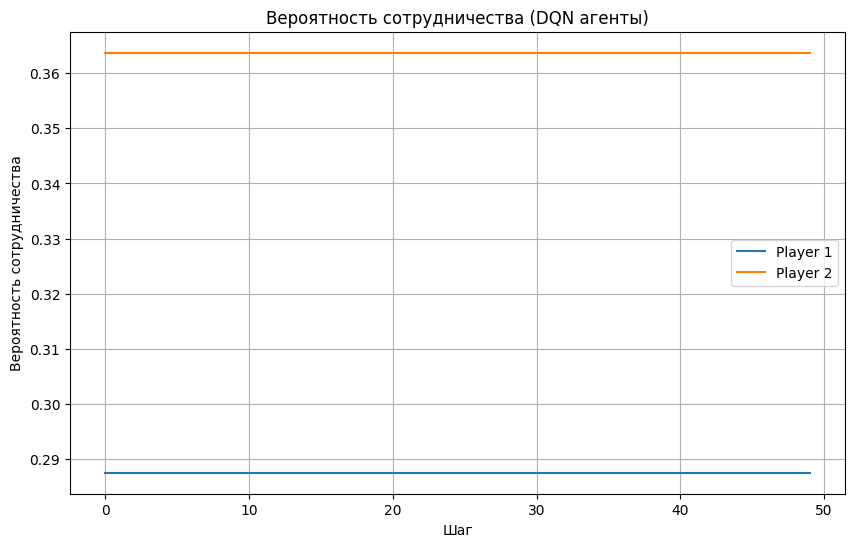

In [4]:
# Запускаем симуляцию дилеммы заключенного с DQN агентами
coop_probs1_dqn, coop_probs2_dqn, history_dqn, rewards_dqn = simulate_neural(
    dilemma_type="pd",
    payoffs=[3, 1, 0, 4],  # Выплаты для дилеммы заключенного [CC, DD, DC, CD]
    agent_type="dqn",
    episodes=200,  # Количество эпизодов обучения
    eval_episodes=50,  # Количество эпизодов для оценки
    show_plots=True
)

### Пример 4: Дилемма заключенного с A2C агентами

Теперь рассмотрим дилемму заключенного с использованием агентов Advantage Actor-Critic (A2C).

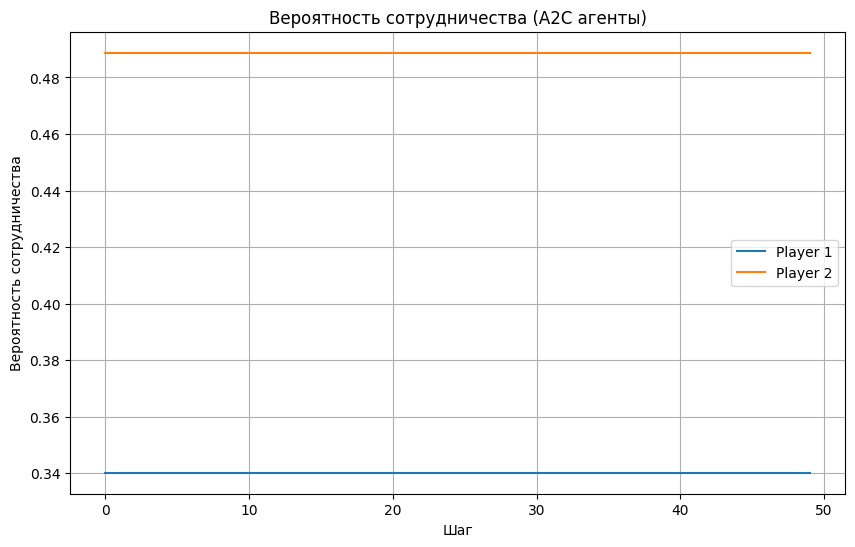

In [5]:
# Запускаем симуляцию дилеммы заключенного с A2C агентами
coop_probs1_a2c, coop_probs2_a2c, history_a2c, rewards_a2c = simulate_neural(
    dilemma_type="pd",
    payoffs=[3, 1, 0, 4],  # Выплаты для дилеммы заключенного [CC, DD, DC, CD]
    agent_type="a2c",
    episodes=200,  # Количество эпизодов обучения
    eval_episodes=50,  # Количество эпизодов для оценки
    show_plots=True
)

### Пример 5: Сравнение классического Q-обучения и нейросетевых агентов

Сравним результаты классического Q-обучения и нейросетевых агентов для дилеммы заключенного.

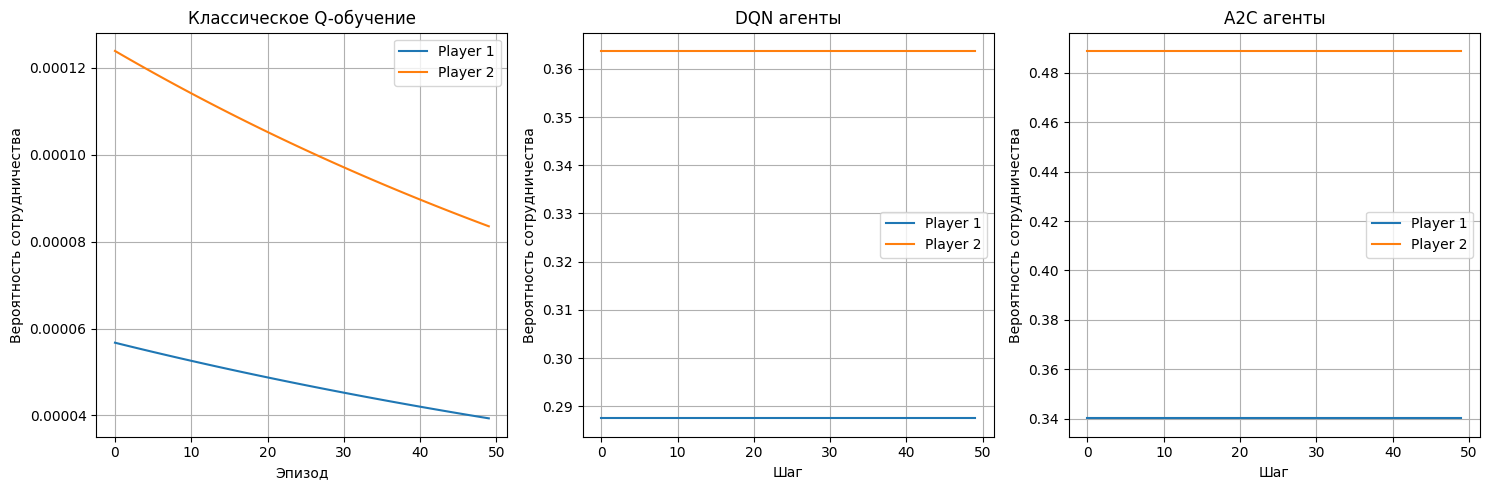

In [6]:
# Визуализируем результаты
plt.figure(figsize=(15, 5))

# Классическое Q-обучение
plt.subplot(1, 3, 1)
plt.plot(pd_pol1_y1[-50:], label='Игрок 1')
plt.plot(pd_pol2_y1[-50:], label='Игрок 2')
plt.title('Классическое Q-обучение')
plt.xlabel('Эпизод')
plt.ylabel('Вероятность сотрудничества')
plt.legend()
plt.grid(True)

# DQN агенты
plt.subplot(1, 3, 2)
plt.plot(coop_probs1_dqn, label='Игрок 1')
plt.plot(coop_probs2_dqn, label='Игрок 2')
plt.title('DQN агенты')
plt.xlabel('Шаг')
plt.ylabel('Вероятность сотрудничества')
plt.legend()
plt.grid(True)

# A2C агенты
plt.subplot(1, 3, 3)
plt.plot(coop_probs1_a2c, label='Игрок 1')
plt.plot(coop_probs2_a2c, label='Игрок 2')
plt.title('A2C агенты')
plt.xlabel('Шаг')
plt.ylabel('Вероятность сотрудничества')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Сохранение результатов

Можно сохранить результаты симуляции для дальнейшего анализа.

In [7]:
# Сохраняем результаты в JSON
comparison_results = {
    'classic_q': {
        'player1': pd_pol1_y1[-50:],
        'player2': pd_pol2_y1[-50:]
    },
    'dqn': {
        'player1': coop_probs1_dqn,
        'player2': coop_probs2_dqn
    },
    'a2c': {
        'player1': coop_probs1_a2c,
        'player2': coop_probs2_a2c
    },
    'dilemmas': {
        'types': dilemma_types,
        'names': dilemma_names,
        'results': {
            'player1': all_pol1,
            'player2': all_pol2
        }
    }
}

with open('comparison_results.json', 'w') as f:
    json.dump(comparison_results, f, cls=NpEncoder)

print("Результаты сохранены в файл comparison_results.json")

Результаты сохранены в файл comparison_results.json
